##P1.Cargando Librerías necesarias


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



##P2. Conectarse a google drive y cargar el CSV con el dataset


In [ ]:
#si ya tiene habilitado la carpeta de gdrive no ejecute este código
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_mercadeo = pd.DataFrame()
df_mercadeo = pd.read_csv('/content/gdrive/My Drive/IA/mercadeo_bancario.csv', encoding='utf-8')

##P3. Conociendo los datos


In [ ]:
#primeros 20 registros del dataframe
df_mercadeo.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,yes,yes,no,499476,75,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,0,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,0,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,0,1,cellular,apr,thu,191,33,1,414,0


In [ ]:
df_mercadeo.dtypes


edad                         int64
trabajo                     object
estado_civil                object
educacion                   object
total_hijos                  int64
credito_sin_pago            object
prestamo_vivienda           object
prestamo_personal           object
valor_prestamo               int64
dias_ultimo_pago             int64
tarjetas_credito             int64
contacto                    object
mes                         object
dia_semana                  object
duracion_ultimo_contacto     int64
dias_ultimo_contacto         int64
anterior_contacto            int64
numero_empleados             int64
si_no                        int64
dtype: object

##Conversión de palabras a números

###Trabajo

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['trabajo']=label_encoder.fit_transform(df_mercadeo['trabajo'])


*   blue-collar = 1
*   technician = 9
*   management = 4
*   services = 7
*   retired = 5
*   admin = 0
*   housemaid = 3
*   unemployed = 10
*   technician = 9
*   entrepreneur = 2

###Estado civil


In [301]:
##df_mercadeo.replace({"divorced":1,"married":2,"unknown":0,"single":3},inplace=True) (funciona)
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['estado_civil']=label_encoder.fit_transform(df_mercadeo['estado_civil'])


KeyError: ignored

###Educación

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['educacion']=label_encoder.fit_transform(df_mercadeo['educacion'])

*   blue-collar = 1
*   technician = 9
*   management = 4
*   services = 7
*   retired = 5
*   admin = 0
*   housemaid = 3
*   unemployed = 10
*   technician = 9
*   entrepreneur = 2

###Crédito sin pago

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['credito_sin_pago']=label_encoder.fit_transform(df_mercadeo['credito_sin_pago'])

*   unknown = 1
*   no = 0
*   yes = 2

### Prestamo de la vivienda

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['prestamo_vivienda']=label_encoder.fit_transform(df_mercadeo['prestamo_vivienda'])

*   yes = 2
*   no = 0

### Prestamo personal

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['prestamo_personal']=label_encoder.fit_transform(df_mercadeo['prestamo_personal'])

*   no = 0
*   yes = 2

### Contacto

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['contacto']=label_encoder.fit_transform(df_mercadeo['contacto'])

*   cellular = 0
*   telephone = 1

### Mes

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['mes']=label_encoder.fit_transform(df_mercadeo['mes'])

*   Aug = 1
*   Nov = 7
*   Jun = 4
*   Apr = 0
*   Aug = 1
*   Jul = 3
*   May = 6
*   Oct = 8

### Día de la semana

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_mercadeo['dia_semana']=label_encoder.fit_transform(df_mercadeo['dia_semana'])

*   thu = 2
*   fri = 0
*   tue = 3
*   mon = 1

In [267]:
df_mercadeo.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,married,2,7,1,2,0,268017,0,5,0,1,2,210,43,0,88,0
1,53,9,married,7,1,0,0,0,0,0,0,0,7,0,138,0,0,14,0
2,28,4,single,6,3,0,2,0,308036,0,0,0,4,2,339,27,2,1993,1
3,39,7,married,0,1,0,0,0,0,0,4,0,0,0,185,0,0,1338,0
4,55,5,married,2,2,0,2,0,249888,0,4,0,1,0,137,2,1,1184,1
5,30,4,divorced,2,6,2,2,0,499476,75,1,0,3,3,68,90,0,1553,0
6,37,1,married,2,6,0,2,0,86520,0,5,0,6,2,204,66,0,442,0
7,39,1,divorced,5,4,0,2,0,176081,0,1,0,6,0,191,51,0,495,0
8,36,0,married,6,6,0,0,0,0,0,3,0,4,1,174,0,1,1097,1
9,27,1,single,2,3,0,2,0,323709,0,1,0,0,2,191,33,1,414,0


In [ ]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df_mercadeo.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df_mercadeo.isnull().sum())

matrix df [MxN] ->(41188, 19)
---Columnas con valores nulos--
edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64


## Modelo de regresión Lineal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


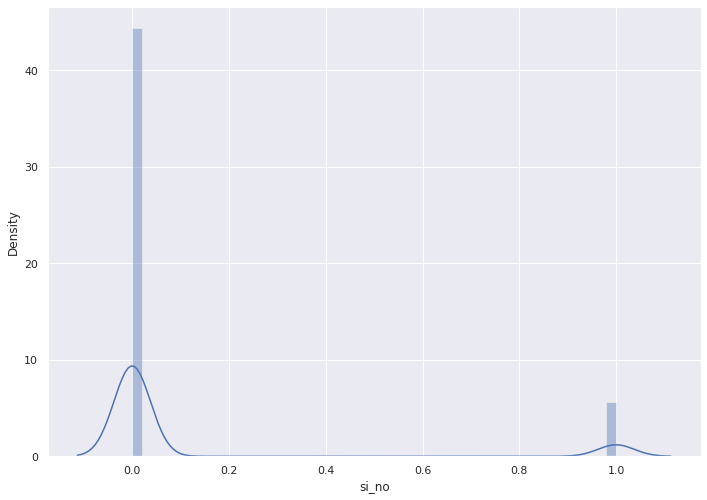

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df_mercadeo['si_no'])                #agregamos los datos
plt.show()    

### Matriz de correlación

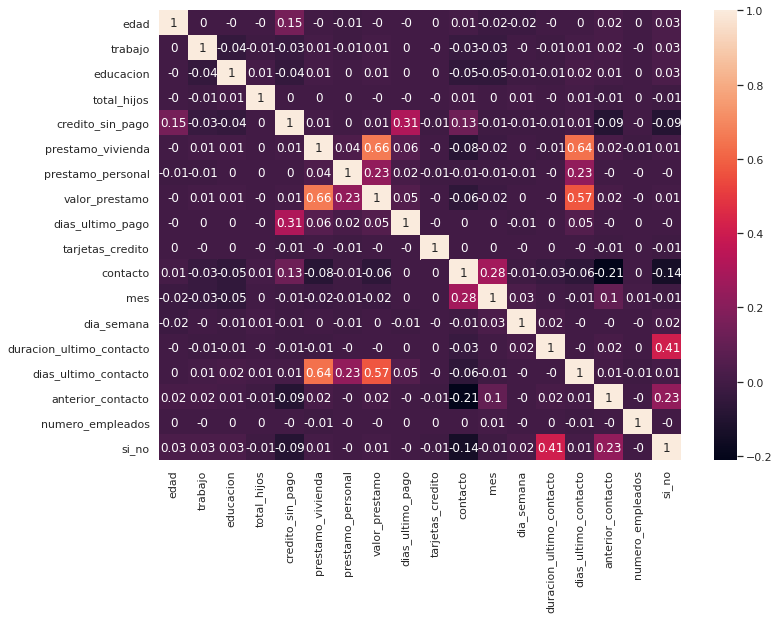

In [ ]:
correlation_matrix = df_mercadeo.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Preparación de los datos para el entrenamiento del modelo

In [258]:
X = pd.DataFrame(np.c_[df_mercadeo['edad'], df_mercadeo['educacion'], df_mercadeo['prestamo_personal'], df_mercadeo["tarjetas_credito"], df_mercadeo['numero_empleados'], df_mercadeo['duracion_ultimo_contacto']], 
                 columns = ['edad','educacion','contacto', '"tarjetas_credito"', 'numero_empleados','duracion_ultimo_contacto'])
Y = df_mercadeo['si_no']

### Dividir los datos en conjuntos de entrenamiento (50%) y pruebas (50%)

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0.2)
print("x50%: "+str(X_train.shape) +", x50%: "+str(X_test.shape))
print("y50%: "+str(Y_train.shape) +", y50%: "+str(Y_test.shape))

x50%: (20594, 6), x50%: (20594, 6)
y50%: (20594,), y50%: (20594,)


###Entrenar el modelo

In [260]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Evaluación del modelo

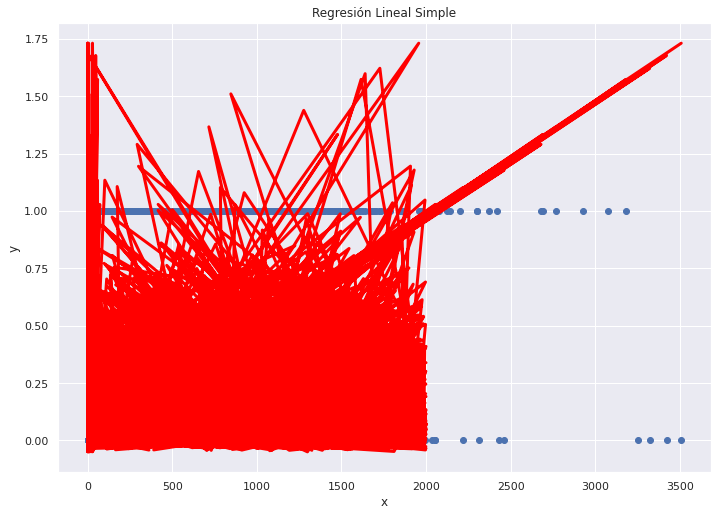


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.1723248134261438


In [261]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['duracion_ultimo_contacto'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 0.2790719894845438
R2 resultado es 0.2377625262819496


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 0.27724111320116435
R2 resultado es 0.21356545154383832


##Regresión Logistica

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


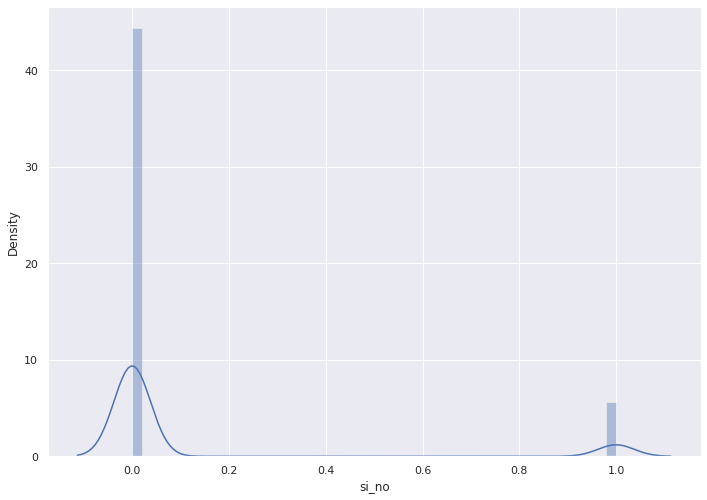

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df_mercadeo['si_no'])                #agregamos los datos
plt.show()    

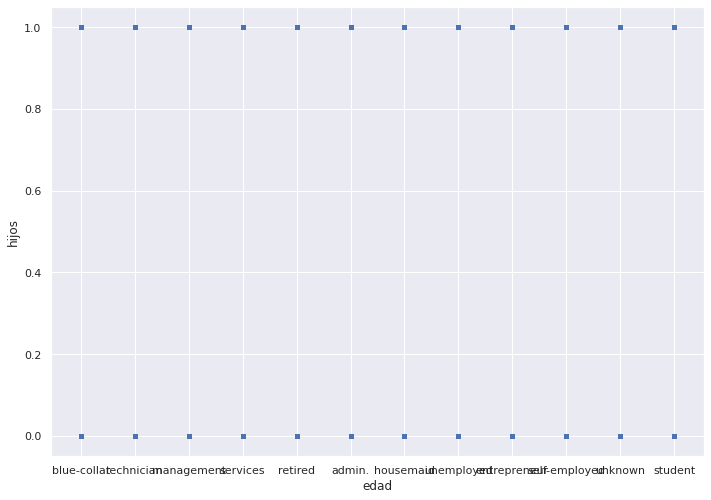

In [ ]:
X = df_mercadeo['trabajo']
y = df_mercadeo['si_no']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('edad')
plt.ylabel('hijos')
plt.show()

In [263]:
data = {"edad":df_mercadeo["edad"],"educacion":df_mercadeo["educacion"],"prestamo_personal":df_mercadeo["prestamo_personal"],
        "tarjetas_credito":df_mercadeo["tarjetas_credito"],"numero_empleados":df_mercadeo["numero_empleados"], "duracion_ultimo_contacto":df_mercadeo["duracion_ultimo_contacto"]}
X = pd.DataFrame(data=data)
y = np.array(df_mercadeo["si_no"])

x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=4, test_size=0.2)

#instancia de LogisticRegression
regresion_logistica = LogisticRegression()
#Entrenamiento
regresion_logistica.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
y_prediccion =regresion_logistica.predict(x_test)
#verificar exactitud
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud porcentual = "+str(100*exactitud))

exactitud porcentual = 89.1357125515902


In [300]:
pruebaarray = np.array([[25,2,2,3,1900,2],[30,0,2,5,125,0],[80,2,2,3,5000,3],[30,3,1,3,150,1],[28,4,1,0,200,1],[31,5,2,5,500,2],[104,1021,210,540,137,75]])
x_nuevo = pd.DataFrame(pruebaarray,columns=["edad","educacion","prestamo_personal","tarjetas_credito","numero_empleados","duracion_ultimo_contacto"])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 0 0 0 0 0 0]
